In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

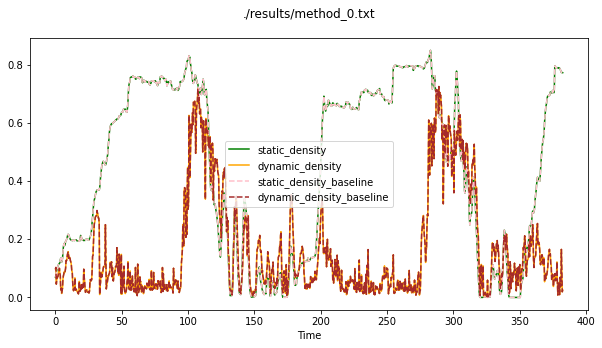

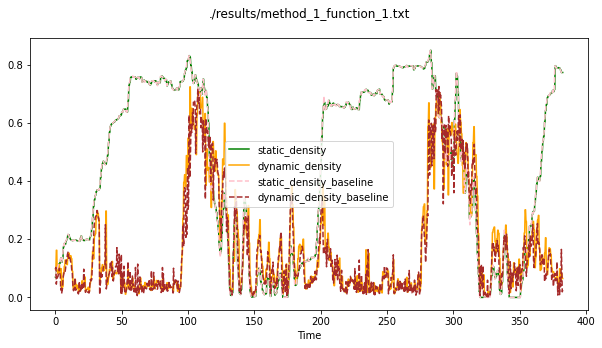

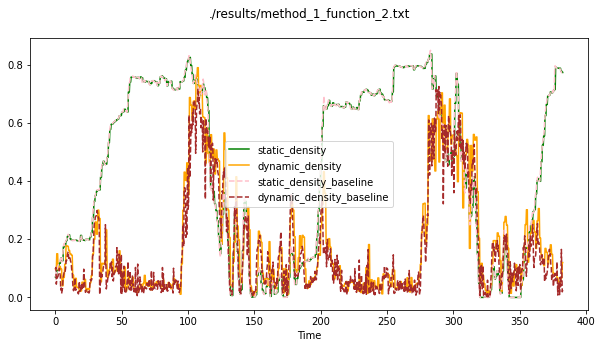

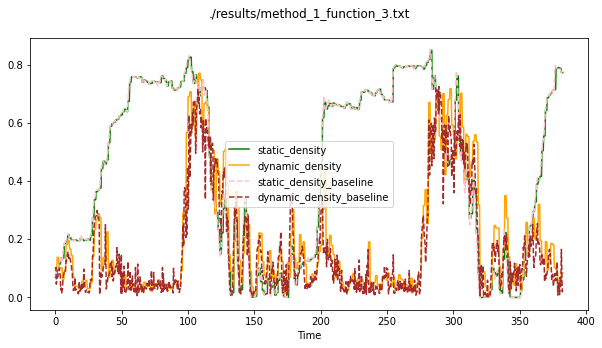

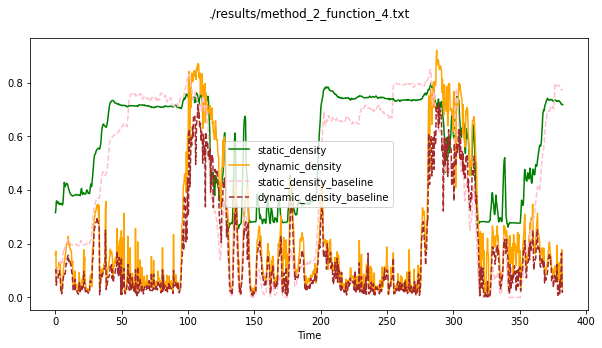

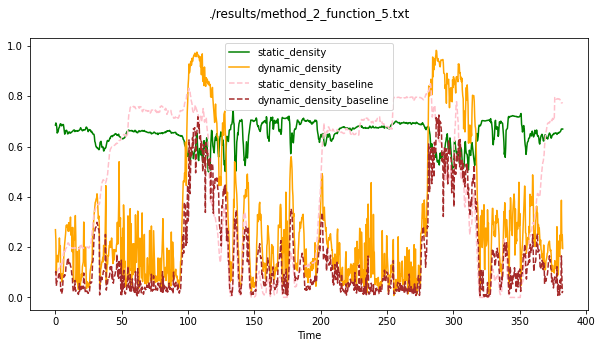

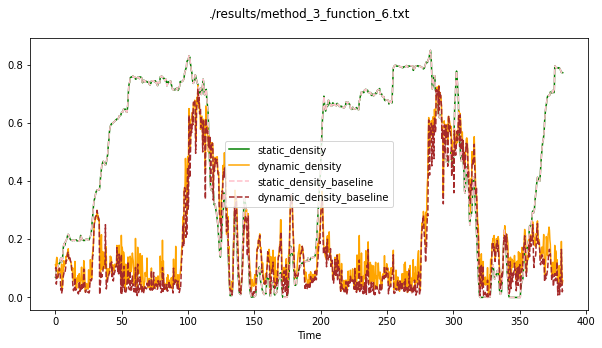

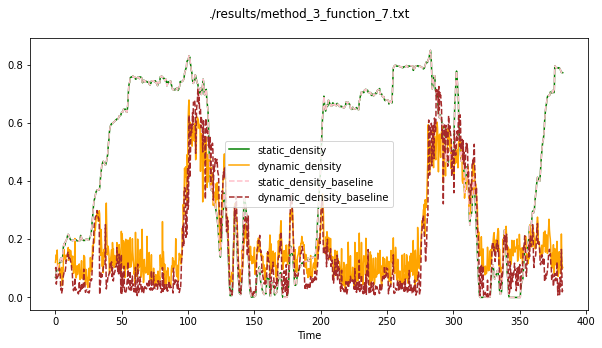

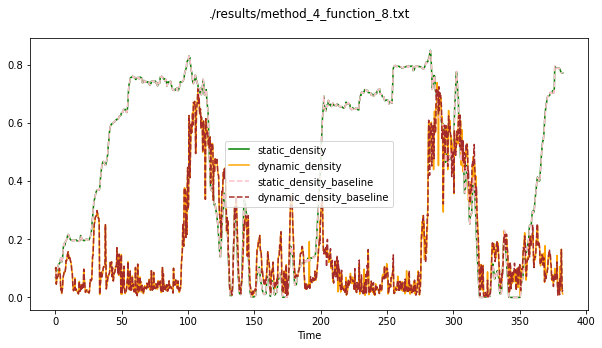

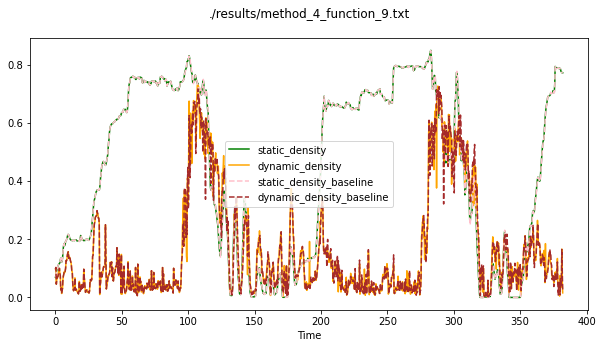

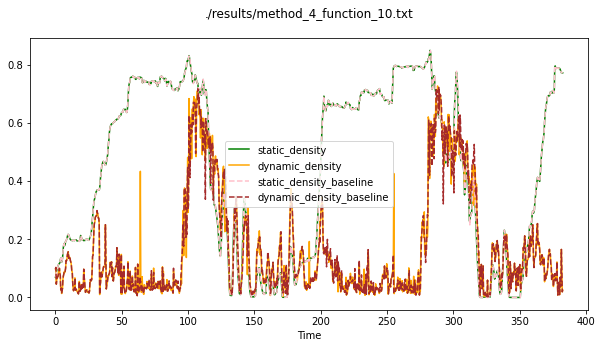

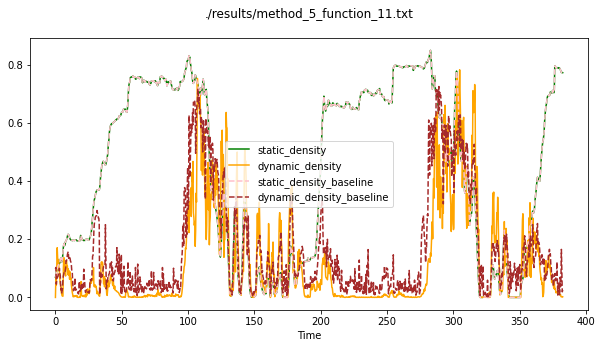

In [195]:
out_files = open('./model_result/plotted_files.txt', 'r')
df0 = pd.read_csv('./model_result/method_0.txt', delimiter = ' ')
for file in out_files:
    df = pd.read_csv(file.rstrip('\n'), delimiter = ' ')
    df['Time'] = df['frame_number']/15
    df['static_density_baseline'] = df0['static_density']
    df['dynamic_density_baseline'] = df0['dynamic_density']
#     print(file)
    line_graph = df[['Time', 'static_density', 'dynamic_density', 'static_density_baseline', 'dynamic_density_baseline']].plot(title=file, style=['-','-','--', '--'], color=['green','orange','pink','brown'], kind = "line", x = 'Time', figsize=(10,5), legend = True)
    fig=line_graph.get_figure()
    fig.savefig(file[:-4]+'jpg', facecolor=fig.get_facecolor(), transparent=True, dpi=300,bbox_inches='tight')

# pd.read_csv('../results/utility_runtime.txt', delimiter=' ')
    


In [188]:
df


,frame_number,static_density,dynamic_density,Time,static_density_baseline,dynamic_density_baseline
0,1,0.069836,0.000000,0.066667,0.069836,0.098108
1,6,0.073353,0.070631,0.400000,0.073353,0.103172
2,11,0.086662,0.042355,0.733333,0.086662,0.045799
3,16,0.093538,0.100635,1.066667,0.093538,0.061997
4,21,0.097946,0.171009,1.400000,0.097946,0.064460
...,...,...,...,...,...,...
1143,5716,0.778045,0.002901,381.066667,0.778045,0.063038
1144,5721,0.773548,0.002720,381.400000,0.773548,0.165311
1145,5726,0.773616,0.001799,381.733333,0.773616,0.095487
1146,5731,0.773730,0.001059,382.066667,0.773730,0.019293


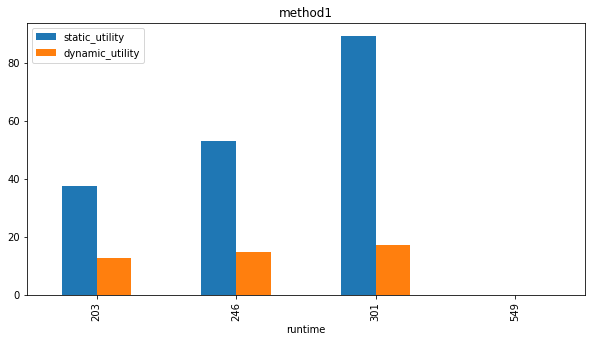

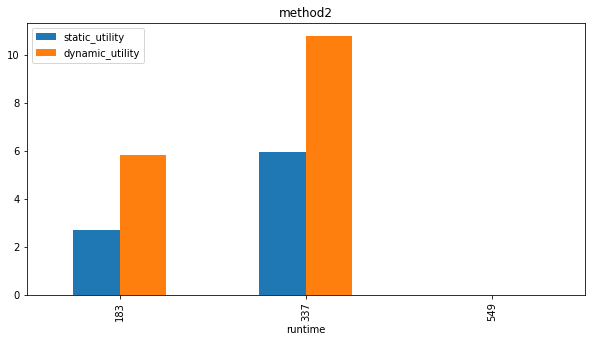

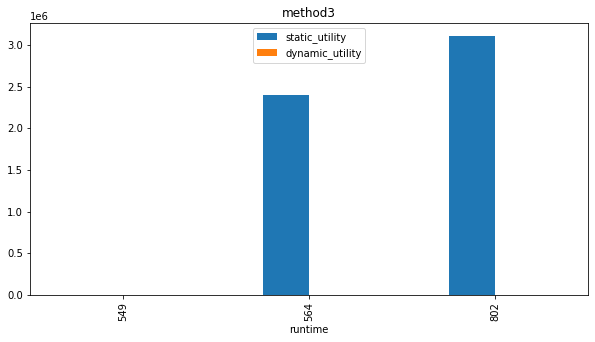

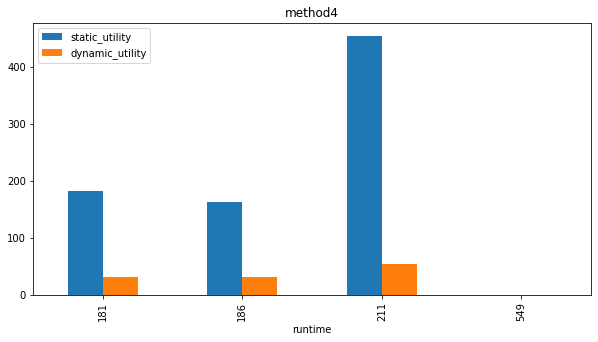

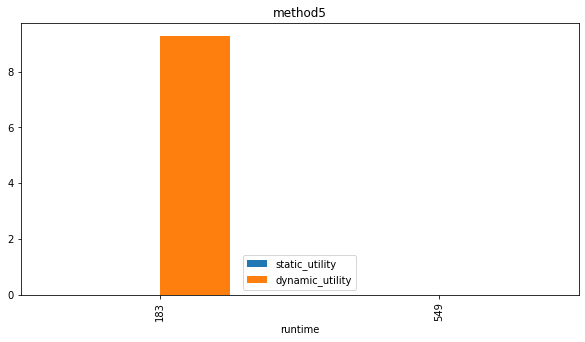

In [197]:
df = pd.read_csv('./model_result/utility_runtime.txt', delimiter = ' ', header = 0)

df['static_utility'] = 1/df['static_error']
df['dynamic_utility'] = 1/df['dynamic_error']


for idx, row in df.iterrows():
    if row['method'] == 0:
        df.at[idx, 'parameter1'] = 1
        df.at[idx, 'parameter2'] = 1088*1920
        df.at[idx, 'parameter3'] = 1
        df.at[idx, 'parameter4'] = 1
        df.at[idx, 'parameter5'] = 0
    elif row['method'] == 2:
        df.at[idx, 'parameter'+str(int(row['method']))] = row['argument1']*row['argument2']
    else:
        df.at[idx, 'parameter'+str(int(row['method']))] = row['argument1']

df = df.sort_values('runtime')



for i in range(1,6):
    df1 = df[(df['method'] == i) | (df['method'] == 0)]
    bar_graph = df1[['static_utility', 'dynamic_utility', 'runtime']].plot(kind = "bar", x = 'runtime',figsize=(10,5), legend = True, title = "method"+str(i))
    fig=bar_graph.get_figure()
    fig.savefig('method'+str(i)+'.jpg', facecolor=fig.get_facecolor(), transparent=True, dpi=300,bbox_inches='tight')


In [150]:
df

,method,argument1,argument2,static_error,dynamic_error,runtime,static_utility,dynamic_utility,parameter1,parameter2,parameter3,parameter4,parameter5
10,4,6,0,5.486310e-03,0.032082,181,1.822719e+02,31.169932,NaN,NaN,NaN,6.0,NaN
5,2,500,250,3.689590e-01,0.171848,183,2.710328e+00,5.819096,NaN,125000.0,NaN,NaN,NaN
11,5,1,0,0.000000e+00,0.107753,183,inf,9.280484,NaN,NaN,NaN,NaN,1.0
9,4,4,0,6.141490e-03,0.031381,186,1.628269e+02,31.865908,NaN,NaN,NaN,4.0,NaN
3,1,4,0,2.657330e-02,0.078608,203,3.763176e+01,12.721416,4.0,NaN,NaN,NaN,NaN
8,4,2,0,2.197480e-03,0.018812,211,4.550667e+02,53.156994,NaN,NaN,NaN,2.0,NaN
2,1,3,0,1.879040e-02,0.068180,246,5.321866e+01,14.667122,3.0,NaN,NaN,NaN,NaN
1,1,2,0,1.119650e-02,0.058290,301,8.931362e+01,17.155454,2.0,NaN,NaN,NaN,NaN
4,2,1000,500,1.683010e-01,0.092540,337,5.941735e+00,10.806138,NaN,500000.0,NaN,NaN,NaN
0,0,0,0,0.000000e+00,0.000000,549,inf,inf,1.0,2088960.0,1.0,1.0,0.0


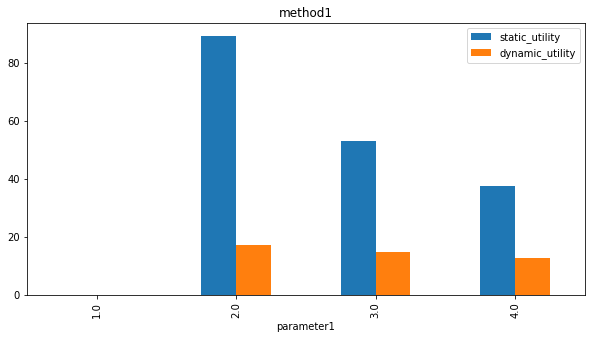

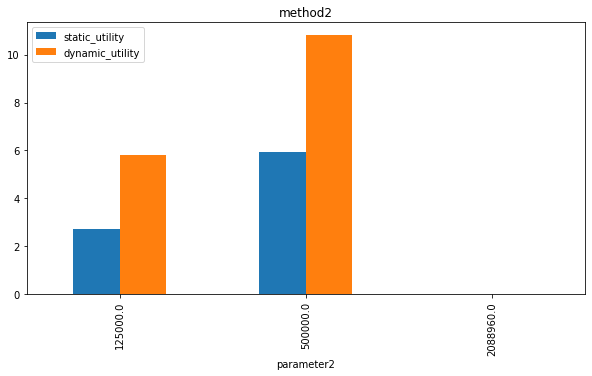

In [163]:
for i in range(1, 3):
    df1 = df[(df['method'] == i) | (df['method'] == 0)]
    df1 = df1.sort_values('parameter'+str(i), ascending = True)
    bar_graph = df1[['static_utility', 'dynamic_utility', 'parameter' + str(i)]].plot(kind = "bar", x = 'parameter'+str(i),figsize=(10,5), legend = True, title = "method"+str(i))
    fig=line_graph.get_figure()
    fig.savefig(file[:-4]+'jpg', facecolor=fig.get_facecolor(), transparent=True, dpi=300,bbox_inches='tight')

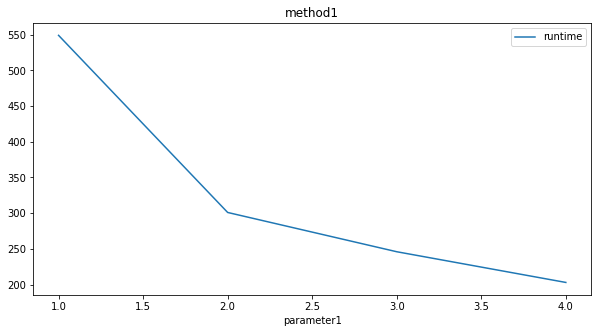

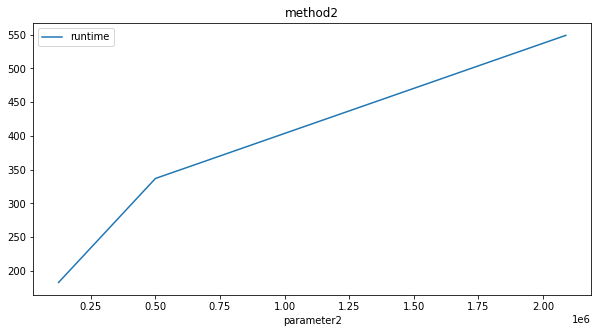

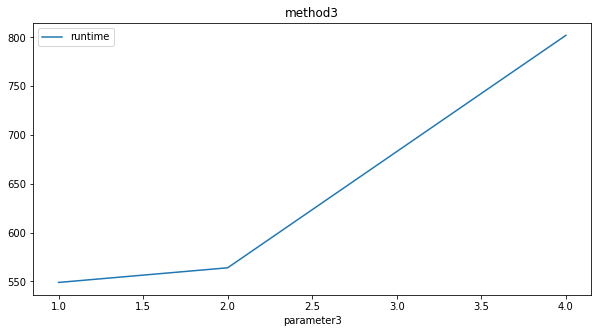

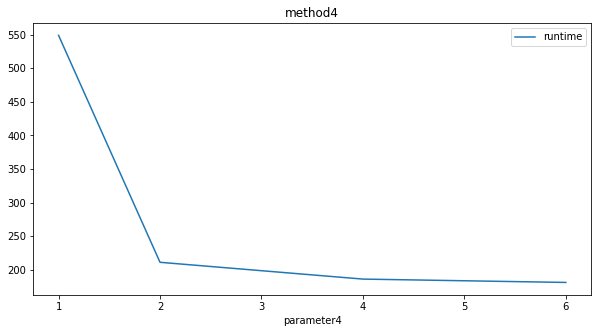

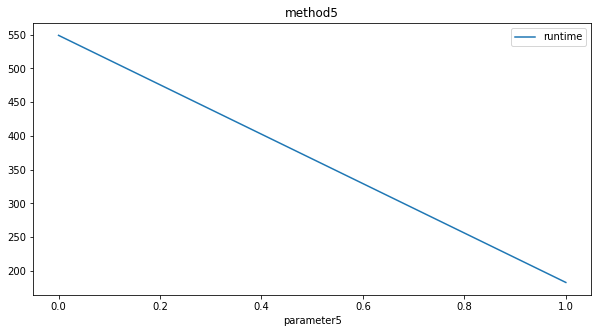

In [199]:
for i in range(1, 6):
    df1 = df[(df['method'] == i) | (df['method'] == 0)]
    df1 = df1.sort_values('parameter'+str(i), ascending = True)
    line_graph = df1[['runtime', 'parameter' + str(i)]].plot(kind = "line", x = 'parameter'+str(i),figsize=(10,5), legend = True, title = "method"+str(i))
    fig=line_graph.get_figure()
    fig.savefig('method'+str(i)+'_line.jpg', facecolor=fig.get_facecolor(), transparent=True, dpi=300,bbox_inches='tight')

In [204]:
!jupytext --to py notebook.ipynb


/bin/bash: jupytext: command not found
